In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [14]:
import os, shutil
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
from scipy.io import savemat
sns.set()

In [ ]:
dir = r'C:\Users\kuki\Desktop\Skin\MAT\bd_immune\young'
mats = [_ for _ in os.listdir(dir) if _.endswith('e')]
names = [os.path.splitext(_)[0][28:34] for _ in mats]

In [ ]:
print(mats)
print(names)

In [27]:
for mat,fol in zip(mats,names):
    os.mkdir(os.path.join(dir,fol))
    source = os.path.join(dir,mat)
    destination = os.path.join(*[dir,fol,mat])
    shutil.copyfile(source, destination)

In [4]:
npdir = r'C:\Users\kuki\Desktop\Skin\MAT\bd\0422_02\Result based on fibro'
npys = [os.path.join(npdir,_) for _ in os.listdir(npdir) if _.endswith('npy')]
youngfb = [_ for _ in npys if "young_fb" in _ ]
oldfb = [_ for _ in npys if "old_fb" in _ ]
youngim = [_ for _ in npys if "young_immune" in _ ]
oldim = [_ for _ in npys if "old_immune" in _ ]

In [5]:
import re

def natural_sort(l):
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
    return sorted(l, key = alphanum_key)

youngfbsort = natural_sort(youngfb)
oldfbsort = natural_sort(oldfb)
youngimsort = natural_sort(youngim)
oldimsort = natural_sort(oldim)

In [6]:
for i in youngfbsort:
    print(i)

C:\Users\kuki\Desktop\Skin\MAT\bd\0422_02\Result based on fibro\height_1_young_fb.npy
C:\Users\kuki\Desktop\Skin\MAT\bd\0422_02\Result based on fibro\height_2_young_fb.npy
C:\Users\kuki\Desktop\Skin\MAT\bd\0422_02\Result based on fibro\height_3_young_fb.npy
C:\Users\kuki\Desktop\Skin\MAT\bd\0422_02\Result based on fibro\height_4_young_fb.npy
C:\Users\kuki\Desktop\Skin\MAT\bd\0422_02\Result based on fibro\height_5_young_fb.npy
C:\Users\kuki\Desktop\Skin\MAT\bd\0422_02\Result based on fibro\height_6_young_fb.npy
C:\Users\kuki\Desktop\Skin\MAT\bd\0422_02\Result based on fibro\height_7_young_fb.npy
C:\Users\kuki\Desktop\Skin\MAT\bd\0422_02\Result based on fibro\height_8_young_fb.npy
C:\Users\kuki\Desktop\Skin\MAT\bd\0422_02\Result based on fibro\height_9_young_fb.npy
C:\Users\kuki\Desktop\Skin\MAT\bd\0422_02\Result based on fibro\height_10_young_fb.npy
C:\Users\kuki\Desktop\Skin\MAT\bd\0422_02\Result based on fibro\height_11_young_fb.npy
C:\Users\kuki\Desktop\Skin\MAT\bd\0422_02\Result bas

In [9]:
def appendnpy(npylist):
    npys =[]
    for npy in npylist:
        npy = np.load(npy)
        npys.append(npy)
    npys = np.stack(npys, axis=0)
    return npys

youngfbs = appendnpy(youngfbsort)
oldfbs = appendnpy(oldfbsort)

array([[11.83,  6.81,  6.63, 10.75, 11.29,  8.96, 13.08,  9.32,  9.5 ,
        11.83],
       [11.26,  9.38,  5.76, 10.59, 10.19, 11.8 ,  9.65,  8.85, 10.05,
        12.47],
       [ 8.38,  4.79,  6.91, 14.63, 15.03,  8.38, 14.1 ,  8.38, 10.51,
         8.91],
       [11.  ,  5.67,  6.25, 14.  , 17.13,  8.22, 10.76,  9.03,  9.61,
         8.33],
       [ 6.57,  3.45,  4.27, 16.26, 18.39,  9.52, 16.42,  9.03,  7.06,
         9.03],
       [10.85,  6.46,  7.42, 12.77, 15.25,  9.48, 10.44,  8.93,  9.48,
         8.93],
       [11.35,  6.43,  8.42, 10.29, 13.22,  8.19, 12.28,  7.6 ,  9.01,
        13.22],
       [12.49,  7.83,  8.38, 12.87, 11.12,  8.43,  9.91,  8.98, 10.3 ,
         9.69],
       [13.53,  7.47,  8.39, 11.49, 13.11, 10.29, 10.08,  7.05,  8.81,
         9.8 ],
       [ 9.39, 12.44, 11.97,  8.22, 12.21,  8.22, 11.03,  7.98,  9.39,
         9.15],
       [10.63,  6.83,  9.21, 11.59, 14.6 ,  7.94, 10.  ,  8.89, 11.43,
         8.89],
       [11.47,  9.07,  9.57,  9.27, 12.56, 

In [15]:
youngf = {'young':youngfbs}
oldf = {'old':oldfbs}
savemat('young.mat',youngf)
savemat('old.mat',oldf)

In [10]:
for i in youngfbs:
    print(i)

[11.83  6.81  6.63 10.75 11.29  8.96 13.08  9.32  9.5  11.83]
[11.26  9.38  5.76 10.59 10.19 11.8   9.65  8.85 10.05 12.47]
[ 8.38  4.79  6.91 14.63 15.03  8.38 14.1   8.38 10.51  8.91]
[11.    5.67  6.25 14.   17.13  8.22 10.76  9.03  9.61  8.33]
[ 6.57  3.45  4.27 16.26 18.39  9.52 16.42  9.03  7.06  9.03]
[10.85  6.46  7.42 12.77 15.25  9.48 10.44  8.93  9.48  8.93]
[11.35  6.43  8.42 10.29 13.22  8.19 12.28  7.6   9.01 13.22]
[12.49  7.83  8.38 12.87 11.12  8.43  9.91  8.98 10.3   9.69]
[13.53  7.47  8.39 11.49 13.11 10.29 10.08  7.05  8.81  9.8 ]
[ 9.39 12.44 11.97  8.22 12.21  8.22 11.03  7.98  9.39  9.15]
[10.63  6.83  9.21 11.59 14.6   7.94 10.    8.89 11.43  8.89]
[11.47  9.07  9.57  9.27 12.56  8.37  9.97 10.27 10.77  8.67]
[ 8.14  9.39 11.9  11.69 12.11  9.81  9.6   9.19  9.19  8.98]
[10.04  8.45  7.75 13.03 13.38 11.09 10.39  7.39  8.1  10.39]
[13.43  8.48  9.42 11.43 11.78  7.66 11.31  8.72  8.95  8.83]
[11.13  8.66 11.34 10.52 12.37  9.48  8.87 11.75  7.63  8.25]
[16. 16.

In [12]:
youngmode3 = [_[2] for _ in youngfbs]
oldmode3 = [_[2] for _ in oldfbs]

[6.63,
 5.76,
 6.91,
 6.25,
 4.27,
 7.42,
 8.42,
 8.38,
 8.39,
 11.97,
 9.21,
 9.57,
 11.9,
 7.75,
 9.42,
 11.34,
 20.0,
 12.0,
 7.26,
 6.33,
 12.22,
 10.51,
 9.27,
 7.94]

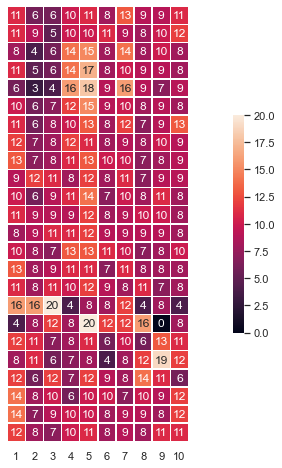

In [42]:
plt.figure(figsize=(16,8))
ax = sns.heatmap(youngfbs.astype('int'), annot=True, linewidths=.5,xticklabels=range(1,11), yticklabels=False, fmt='d', square=True,cbar_kws={"shrink": 0.5,"fraction":0.5})
# plt.figure(figsize=(22,10))
# ax = sns.heatmap(oldfbs.astype('int'), annot=True, linewidths=.5,xticklabels=range(1,11), yticklabels=False, fmt='d', square=True,cbar_kws={"shrink": 0.5,"fraction":0.5})


C:\Users\kuki\Desktop\Skin\MAT\bd\0422_01\Result based on testrun\height_1_young_fb.npy
C:\Users\kuki\Desktop\Skin\MAT\bd\0422_01\Result based on testrun\height_2_young_fb.npy
C:\Users\kuki\Desktop\Skin\MAT\bd\0422_01\Result based on testrun\height_3_young_fb.npy
C:\Users\kuki\Desktop\Skin\MAT\bd\0422_01\Result based on testrun\height_4_young_fb.npy
C:\Users\kuki\Desktop\Skin\MAT\bd\0422_01\Result based on testrun\height_5_young_fb.npy
C:\Users\kuki\Desktop\Skin\MAT\bd\0422_01\Result based on testrun\height_6_young_fb.npy
C:\Users\kuki\Desktop\Skin\MAT\bd\0422_01\Result based on testrun\height_7_young_fb.npy
C:\Users\kuki\Desktop\Skin\MAT\bd\0422_01\Result based on testrun\height_8_young_fb.npy
C:\Users\kuki\Desktop\Skin\MAT\bd\0422_01\Result based on testrun\height_9_young_fb.npy
C:\Users\kuki\Desktop\Skin\MAT\bd\0422_01\Result based on testrun\height_10_young_fb.npy
C:\Users\kuki\Desktop\Skin\MAT\bd\0422_01\Result based on testrun\height_11_young_fb.npy
C:\Users\kuki\Desktop\Skin\MAT